# Skateboard

Show parts, create functions to establish "can work together" relationship

 - create random parts
 - add attributes to parts:
	- weight
	- cost
	- material
	- durability (km)
 - add attributes that are specific to category:
	- eg: diameter of bearing in wheel, diameter of wheel


### Parts

 - Deck
 - Grip Tape
 - Truck Assembly (x2)
 - Bearing (x8)
 - Wheel (x4)
 - Axle Lock Nut (x4)
 - Bolts (x8)
 - Nuts (x8)

In [129]:
!pip install random-word yfiles_jupyter_graphs
!pip install lorem-text neo4j


from yfiles_jupyter_graphs import GraphWidget


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [130]:
# functions
from random_word import RandomWords
import random
import string
from lorem_text import lorem


r = RandomWords()

# print(r.get_random_word())
# print(lorem.words(1))

def get_random_string(length):
    # choose from all lowercase letter
    letters = string.ascii_uppercase
    result_str = ''.join(random.choice(letters) for i in range(length))
    # print("Random string of length", length, "is:", result_str)
    return result_str
    
def make_sku():
    return get_random_string(2)+'-'+get_random_string(6)

def make_item_name(category):
    return (lorem.words(1)+' '+category).title()

def make_weight():
    return random.randint(100, 500)

def make_durability():
    return random.randint(50, 250)

def make_cost(min = 1, max = 250):
    return random.randint(min, max)

# print(make_sku())
# print(make_item_name('deck'))

In [131]:
types = [
    "skateboard",
    "deck",
    "grip_tape",
    "truck",
    "bearing",
    "wheel",
    "axle_lock_nut",
    "bolt",
    "nut"
]

# https://www.surfertoday.com/board-size-chart/skateboard
deck_widths = [6,6.5,7,8]
deck_lengths = [27,29,32]
deck_materials = ["wood","plastic"]

grip_tape_widths = [6,6.5,7,8]
grip_tape_lengths = [27,29,32]
grip_tape_materials = ["paper","plastic"]

truck_axel_lenghts = [7.75,8]
truck_hanger_length = [5,5.25,5.5]
truck_materials = ["steel"]

wheel_diameter = [49,52,55,60,65]
wheel_hardness = [78,88,96,101]
wheel_materials = ["plastic","rubber"]

# https://www.warehouseskateboards.com/help/Skateboard-Bearings-Buying-Guide
bearing_abecs = [1,3,5,7,9]
bearing_materials = ["steel","ceramic"]

axel_lock_nut_materials = ["steel"]

bolt_materials = ["steel"]
bolt_heads = ["phillips","hex"]
bolt_colors = ["black","gold"]
bolt_lenghts = [2.54,5.08]
bolt_threads = ["10x32"]

nut_materials = ["steel"]
nut_colors = ["black","gold"]
nut_threads = ["10x32"]

def make_item(category):
    item = {
        "sku": make_sku(),
        "name": make_item_name(category),
        "category": category,
        "weight": make_weight(),
        "durability": make_durability(),
    }

    if category == "skateboard":
      # remove default attributes - inherited from children
      item.pop("weight")
      item.pop("durability")

    if category == "deck":
      item["width"] = random.choice(deck_widths)
      item["lenth"] = random.choice(deck_lengths)
      item["material"] = random.choice(deck_materials)
      item["cost"] = make_cost(4000,8000)

    elif category == "truck":
      item["axle_length"] = random.choice(truck_axel_lenghts)
      item["hanger_length"] = random.choice(truck_hanger_length)
      item["material"] = random.choice(truck_materials)
      item["cost"] = make_cost(1000,3000)

    elif category == "grip_tape":
      item["length"] = random.choice(grip_tape_lengths)
      item["width"] = random.choice(grip_tape_widths)
      item["material"] = random.choice(grip_tape_materials)
      item["cost"] = make_cost(500,700)

    elif category == "bearing":
      item["inner_diameter"] = 8
      item["outer_diameter"] = 22
      item["thickness"] = 7
      item["abec"] = random.choice(bearing_abecs)
      item["material"] = random.choice(bearing_materials)
      item["cost"] = make_cost(100,800)

    elif category == "wheel":
      item["bearing_diameter"] = 22
      item["bearing_width"] = 7
      item["diameter"] = random.choice(wheel_diameter)
      item["hardness"] = random.choice(wheel_hardness)
      item["material"] = random.choice(wheel_materials)
      item["cost"] = make_cost(300,2000)

    elif category == "axle_lock_nut":
      item["material"] = random.choice(axel_lock_nut_materials)
      item["cost"] = make_cost(10,30)

    elif category == "bolt":
      item["head"] = random.choice(bolt_heads)
      item["color"] = random.choice(bolt_colors)
      item["length"] = random.choice(bolt_lenghts)
      item["thread"] = random.choice(bolt_threads)
      item["material"] = random.choice(bolt_materials)
      item["cost"] = make_cost(10,30)

    elif category == "nut":
      item["color"] = random.choice(nut_colors)
      item["thread"] = random.choice(nut_threads)
      item["material"] = random.choice(nut_materials)
      item["cost"] = make_cost(10,30)

    return item


parts = []
relationships = []

# Build the initial parts
for t in types:
    item = make_item(t)
    parts.append(item)

# Specify relationships (parents)
for part in parts:

  if part["category"] == "skateboard":
    # skateboard is the item - has no parents
    rel = []

    relationships.append({
        "sku": part["sku"],
        "cat": part["category"],
        "rel": rel
    })
  elif part["category"] == "deck":
    # deck belongs to skateboard
    rel = []
    for p in parts:
      if p["category"] == "skateboard":
        rel.append(p["sku"])

    relationships.append({
        "sku": part["sku"],
        "cat": part["category"],
        "rel": rel
    })
  elif part["category"] in ["grip_tape","truck"]:
    # grip_tape and truck belongs to deck
    rel = []
    for p in parts:
      if p["category"] == "deck":
        rel.append(p["sku"])

    relationships.append({
        "sku": part["sku"],
        "cat": part["category"],
        "rel": rel
    })
  elif part["category"] in ["axle_lock_nut","bolt","wheel"]:
    # axle_lock_nut, bolt and wheel belongs to truck
    rel = []
    for p in parts:
      if p["category"] == "truck":
        rel.append(p["sku"])

    relationships.append({
        "sku": part["sku"],
        "cat": part["category"],
        "rel": rel
    })
  elif part["category"] in ["bearing"]:
    # bearing belongs to wheel
    rel = []
    for p in parts:
      if p["category"] == "wheel":
        rel.append(p["sku"])

    relationships.append({
        "sku": part["sku"],
        "rel": rel
    })
  elif part["category"] in ["nut"]:
    # nut belongs to bolt
    rel = []
    for p in parts:
      if p["category"] == "bolt":
        rel.append(p["sku"])

    relationships.append({
        "sku": part["sku"],
        "rel": rel
    })

# TODO: Add qty

print(relationships)

# Create more random parts
for x in range(4):
  for t in types:
      item = make_item(t)
      parts.append(item)

    
print(parts)

[{'sku': 'CC-BKNGFC', 'cat': 'skateboard', 'rel': []}, {'sku': 'ML-NIOXZW', 'cat': 'deck', 'rel': ['CC-BKNGFC']}, {'sku': 'PT-AWUFQH', 'cat': 'grip_tape', 'rel': ['ML-NIOXZW']}, {'sku': 'LF-YLLEAY', 'cat': 'truck', 'rel': ['ML-NIOXZW']}, {'sku': 'NW-NJCRQB', 'rel': ['OR-GEVRWQ']}, {'sku': 'OR-GEVRWQ', 'cat': 'wheel', 'rel': ['LF-YLLEAY']}, {'sku': 'HU-ZNPXTJ', 'cat': 'axle_lock_nut', 'rel': ['LF-YLLEAY']}, {'sku': 'YW-UOJWUF', 'cat': 'bolt', 'rel': ['LF-YLLEAY']}, {'sku': 'JZ-ANUNFX', 'rel': ['YW-UOJWUF']}]
[{'sku': 'CC-BKNGFC', 'name': 'Ut Skateboard', 'category': 'skateboard'}, {'sku': 'ML-NIOXZW', 'name': 'Accusamus Deck', 'category': 'deck', 'weight': 167, 'durability': 63, 'width': 6.5, 'lenth': 27, 'material': 'wood', 'cost': 4792}, {'sku': 'PT-AWUFQH', 'name': 'Officia Grip_Tape', 'category': 'grip_tape', 'weight': 307, 'durability': 98, 'length': 29, 'width': 7, 'material': 'plastic', 'cost': 683}, {'sku': 'LF-YLLEAY', 'name': 'Perspiciatis Truck', 'category': 'truck', 'weight'

In [132]:
# write json

import json

parts_lib = {
  "parts": parts,
  "parent_relationships": relationships
}

# # Serializing json
json_object = json.dumps(parts_lib, indent=4)
 
# # Writing to sample.json
with open("parts.json", "w") as outfile:
    outfile.write(json_object)

In [182]:
# Connect to DB
from neo4j import GraphDatabase

# URI examples: "neo4j://localhost", "neo4j+s://xxx.databases.neo4j.io"
URI = "neo4j+s://89698250.databases.neo4j.io"
AUTH = ("neo4j", "nN4v9Y33RjQtEPzqgNAUUbKQj6Os9Hbs_AuGSY7s1DQ")

# Paid
# URI = "neo4j+s://41b163c7.databases.neo4j.io"
# AUTH = ("neo4j", "pZ649euAZ4k7Ep3pLyug7CRk5GkzFrYN2fbfsHT6_Ns")


with GraphDatabase.driver(uri=URI, auth=AUTH) as driver:
    driver.verify_connectivity()

In [134]:
# Clear the DB - Be careful!!!

records, summary, keys = driver.execute_query(
    "MATCH (n) DETACH DELETE (n);",
    database_="neo4j",
)

In [135]:
# Insert the items

cypher_query = """
WITH $json as data
UNWIND data AS p 
MERGE (part:Part {sku:p.sku}) SET
	part.name = p.name, 
	part.category = p.category, 
	part.weight = p.weight, 
	part.material = p.material, 
	part.durability = p.durability,
	part.width = p.width, 
	part.length = p.length, 
	part.cost = p.cost, 
	part.inner_diameter = p.inner_diameter, 
	part.outer_diameter = p.outer_diameter, 
	part.thickness = p.thickness, 
	part.abec = p.abec, 
	part.bearing_diameter = p.bearing_diameter, 
	part.bearing_width = p.bearing_width, 
	part.diameter = p.diameter, 
	part.hardness = p.hardness, 
	part.color = p.color, 
	part.thread = p.thread,
	part.axle_length = p.axle_length,
	part.hanger_length = p.hanger_length
"""

with driver.session() as session:
    result = session.run(cypher_query, json = parts)

print("Done")




Done


In [136]:
# Insert the relationships

cypher_query = """
WITH $json as data
UNWIND data AS p 
MERGE (part:Part {sku:p.sku})

FOREACH (parent IN p.rel | 
	MERGE (p2:Part {sku: parent}) 
 	MERGE (p2)-[:EXPLICIT]->(part))

"""

with driver.session() as session:
    result = session.run(cypher_query, json = relationships)

print("Done")


Done


In [187]:
# Query DB for parts and relationships

with driver.session(database="neo4j") as session:
  graph = session.run("MATCH (p:Part)-[r:EXPLICIT]->(a) RETURN p,r,a;").graph()

# graph


In [184]:
# custom graph functions

def custom_node_color_mapping(index: int, node: dict):
    # print(node)
    if node["properties"]["label"] == "Part":
        if node["properties"]["category"] == "skateboard":
            return "red"
        elif node["properties"]["category"] == "deck":
            return "orange"
        elif node["properties"]["category"] == "grip_tape":
            return "blue"
        elif node["properties"]["category"] == "truck":
            return "purple"
        elif node["properties"]["category"] == "bearing":
            return "green"
        elif node["properties"]["category"] == "wheel":
            return "yellow"
        elif node["properties"]["category"] == "axle_lock_nut":
            return "pink"
        elif node["properties"]["category"] == "bolt":
            return "grey"
        elif node["properties"]["category"] == "nut":
            return "cyan"
        else:
            return "black"
    elif node["properties"]["label"] == "Possible:Product":
        return "red"
    else:
        return "orange"
    
def custom_node_label_mapping(index: int, node: dict):
    # print(node)
    if node["properties"]["label"] == "Part":
        return node["properties"]["sku"] + " - " + node["properties"]["name"]

def custom_edge_label_mapping(index: int, node: dict):
    # print(node)
    if node["properties"]["label"] == "EXPLICIT":
        return "blue"
    elif node["properties"]["label"] == "POSSIBLE_COMPATIBILITY":
        return "red"
    elif node["properties"]["label"] == "IS_ASSEMBLED_FROM":
        return "green"
    else:
        return "black"


In [188]:
# Render the graph...
from google.colab import output
output.enable_custom_widget_manager()

w = GraphWidget(graph=graph)
w.directed = False
w.set_graph_layout("hierarchic")
# w.set_neighborhood(1,[graph.nodes.get(0).id])
w.set_sidebar(enabled = False, start_with = "Neighbourhood")
w.set_overview(False)

w.set_node_color_mapping(custom_node_color_mapping)
w.set_edge_color_mapping(custom_edge_label_mapping)
w.set_node_label_mapping(custom_node_label_mapping)
# w.set_node_scale_factor_mapping(lambda index,node: node["properties"]["cost"] / 1000)


w.show()

GraphWidget(layout=Layout(height='500px', width='100%'))

### Define functions to determine possible relationship(s)

eg: wheel_x_bearing - depends on bearing size

In [140]:
# Possible Compatibility Functions

def deck_x_skateboard() -> str:
  # All decks can make a skateboard
  return """
    MATCH (p1:Part {category:'deck'})
    MATCH (p2:Part {category:'skateboard'})
    WHERE elementId(p1) <> elementId(p2)
    CREATE (p1)-[r:POSSIBLE_COMPATIBILITY]->(p2)
    SET r.cost = p1.cost, r.weight = p1.weight
    """

def grip_tape_x_deck() -> str:
  return """
    MATCH (p1:Part {category:'grip_tape'})
    MATCH (p2:Part {category:'deck'})
    WHERE p1.width <= p2.width 
      // AND p1.length <= p2.length 
      AND elementId(p1) <> elementId(p2)
    CREATE (p1)-[r:POSSIBLE_COMPATIBILITY]->(p2)
    SET r.cost = p1.cost
    SET r.weight = p1.weight
    """

def truck_x_deck() -> str:
  # Assume hanger length <= deck width
  return """
    MATCH (p1:Part {category:'truck'})
    MATCH (p2:Part {category:'deck'})
    WHERE p1.hanger_length <= p2.width 
      AND elementId(p1) <> elementId(p2)
    CREATE (p1)-[r:POSSIBLE_COMPATIBILITY]->(p2)
    SET r.cost = p1.cost, r.weight = p1.weight
    """

def axle_lock_nut_x_truck() -> str:
  # Assume all axle_lock_nut fits all trucks
  return """
    MATCH (p1:Part {category:'axle_lock_nut'})
    MATCH (p2:Part {category:'truck'})
    WHERE elementId(p1) <> elementId(p2)
    CREATE (p1)-[r:POSSIBLE_COMPATIBILITY]->(p2)
    SET r.cost = p1.cost
    SET r.weight = p1.weight
    """

def wheel_x_truck() -> str:
  # Assume all wheels fits all trucks
  return """
    MATCH (p1:Part {category:'wheel'})
    MATCH (p2:Part {category:'truck'})
    WHERE elementId(p1) <> elementId(p2)
    CREATE (p1)-[r:POSSIBLE_COMPATIBILITY]->(p2)
    SET r.cost = p1.cost
    SET r.weight = p1.weight
    """

def bolt_x_truck() -> str:
  # Assume all bolts fits all trucks
  return """
    MATCH (p1:Part {category:'bolt'})
    MATCH (p2:Part {category:'truck'})
    WHERE elementId(p1) <> elementId(p2)
    CREATE (p1)-[r:POSSIBLE_COMPATIBILITY]->(p2)
    SET r.cost = p1.cost
    SET r.weight = p1.weight
    """

def bearing_x_wheel() -> str:
  # bearing needs to fit inside wheel
  return """
    MATCH (p1:Part {category:'bearing'})
    MATCH (p2:Part {category:'wheel'})
    WHERE p1.outer_diameter = p2.bearing_diameter 
      AND p1.thickness = p2.bearing_width 
      AND elementId(p1) <> elementId(p2)
    CREATE (p1)-[r:POSSIBLE_COMPATIBILITY]->(p2)
    SET r.cost = p1.cost
    SET r.weight = p1.weight
    """

def nut_x_bolt() -> str:
  # nut needs to fit on bolt, have the same material and color
  return """
    MATCH (p1:Part {category:'nut'})
    MATCH (p2:Part {category:'bolt'})
    WHERE p1.thread = p2.thread 
      AND p1.material = p2.material 
      AND p1.color = p2.color 
      AND elementId(p1) <> elementId(p2)
    CREATE (p1)-[r:POSSIBLE_COMPATIBILITY]->(p2)
    SET r.cost = p1.cost
    SET r.weight = p1.weight
    """


In [141]:
# Find possible relationships

with driver.session() as session:
    results = session.run(deck_x_skateboard())
    results = session.run(grip_tape_x_deck())
    results = session.run(truck_x_deck())
    results = session.run(axle_lock_nut_x_truck())
    results = session.run(bearing_x_wheel())
    results = session.run(wheel_x_truck())
    results = session.run(bolt_x_truck())
    results = session.run(nut_x_bolt())
    

print("Done")

Done


In [142]:
# Show model with all relationships

with driver.session(database="neo4j") as session:
  graph = session.run("MATCH (p:Part)-[r:EXPLICIT|POSSIBLE_COMPATIBILITY]->(a) RETURN p,r,a;").graph()

# graph


In [143]:
# Render the graph...
from google.colab import output
output.enable_custom_widget_manager()

w = GraphWidget(graph=graph)
w.directed = False
w.set_graph_layout("radial")
# w.set_neighborhood(1,[graph.nodes.get(0).id])
w.set_sidebar(enabled = False, start_with = "Neighbourhood")
w.set_overview(False)

w.set_node_color_mapping(custom_node_color_mapping)
w.set_edge_color_mapping(custom_edge_label_mapping)
w.set_node_label_mapping(custom_node_label_mapping)

w.show()

GraphWidget(layout=Layout(height='500px', width='100%'))

In [144]:
# minimum spanning tree

# possible assemblies

Assemblies are a combination of compatible parts

combine all parts, of a specific category, that is compatible, into a new `thing`. Let's call it `Possible:Assembly`

assemblies are: `deck` (deck + grip), `truck` (truck + lock nut) + `wheel` (wheel + bearing) 


# possible product

Product is a combination of possible assemblies

Combine all `Possible:Assemblies` of a specific category, into a new things called `Possible:Product`

In [145]:
# possible assemblies

# make deck assembly
query = """
  MATCH (p1:Part {category:"deck"})-[r:POSSIBLE_COMPATIBILITY]-(p2:Part {category:"grip_tape"}) 
  WHERE elementId(p1) <> elementId(p2)

  MERGE (a:Possible:Assembly {sku:p1.sku + "-" + p2.sku})
    SET a.category = "deck"
    SET a.cost = p1.cost + p2.cost
    SET a.weight = p1.weight + p2.weight

  MERGE (a)-[:IS_ASSEMBLED_FROM]->(p1)
  MERGE (a)-[:IS_ASSEMBLED_FROM]->(p2);  
"""

with driver.session() as session:
    results = session.run(query)

print("Deck Assembly Done")


# make truck assembly
query = """
  MATCH (p1:Part {category:"truck"})-[r:POSSIBLE_COMPATIBILITY]-(p2:Part {category:"axle_lock_nut"}) 
  WHERE elementId(p1) <> elementId(p2)

  MERGE (a:Possible:Assembly {sku:p1.sku + "-" + p2.sku})
    SET a.category = "truck"
    SET a.cost = p1.cost + p2.cost
    SET a.weight = p1.weight + p2.weight

  MERGE (a)-[:IS_ASSEMBLED_FROM]->(p1)
  MERGE (a)-[:IS_ASSEMBLED_FROM]->(p2);  
"""

with driver.session() as session:
    results = session.run(query)
    
print("Truck Assembly Done")


# make wheel assembly
query = """
  MATCH (p1:Part {category:"wheel"})-[r:POSSIBLE_COMPATIBILITY]-(p2:Part {category:"bearing"}) 
  WHERE elementId(p1) <> elementId(p2)

  MERGE (a:Possible:Assembly {sku:p1.sku + "-" + p2.sku})
    SET a.category = "wheel"
    SET a.cost = p1.cost + p2.cost
    SET a.weight = p1.weight + p2.weight

  MERGE (a)-[:IS_ASSEMBLED_FROM]->(p1)
  MERGE (a)-[:IS_ASSEMBLED_FROM]->(p2);  
"""

with driver.session() as session:
    results = session.run(query)

print("Wheel Assembly Done")


# possible product

query = """
  MATCH (a1:Possible:Assembly {category:"deck"})
  MATCH (a2:Possible:Assembly {category:"truck"})
  MATCH (a3:Possible:Assembly {category:"wheel"})
  WHERE elementId(a1) <> elementId(a2) AND elementId(a2) <> elementId(a3)

  MERGE (a:Possible:Product {sku:a1.sku + "-" + a2.sku + "-" + a3.sku})
    SET a.category = "skateboard"
    SET a.cost = a1.cost + a2.cost + a3.cost
    SET a.weight = a1.weight + a2.weight + a3.weight

  MERGE (a)-[:IS_ASSEMBLED_FROM]->(a1)
  MERGE (a)-[:IS_ASSEMBLED_FROM]->(a2)
  MERGE (a)-[:IS_ASSEMBLED_FROM]->(a3);  
"""

with driver.session() as session:
    results = session.run(query)

print("Products Done")


Deck Assembly Done
Truck Assembly Done
Wheel Assembly Done
Products Done


In [146]:
# Show top 10 cheapest skateboards

query = """
MATCH (n:Product)
WITH n
ORDER BY n.cost ASC
LIMIT 20
MATCH p=(n)-[:IS_ASSEMBLED_FROM*]->()
RETURN p
"""
with driver.session(database="neo4j") as session:
  graph = session.run(query).graph()

# graph

# Render the graph...
from google.colab import output
output.enable_custom_widget_manager()

w = GraphWidget(graph=graph)
w.directed = False
w.set_graph_layout("radial")
# w.set_neighborhood(1,[graph.nodes.get(0).id])
w.set_sidebar(enabled = False, start_with = "Neighbourhood")
w.set_overview(False)

w.set_node_color_mapping(custom_node_color_mapping)
w.set_edge_color_mapping(custom_edge_label_mapping)
w.set_node_label_mapping(custom_node_label_mapping)

w.show()



GraphWidget(layout=Layout(height='500px', width='100%'))

In [175]:
# Show top 50 cheapest skateboards
import pandas as pd
import matplotlib.pyplot as plt

# Define a function to format the cell as currency
def format_currency(value):
    value = value / 100
    return '${:,.2f}'.format(value)

def format_float(value):
    value = value / 100
    return '{:,.2f}'.format(value)

query = """
MATCH (n:Product)
return n.sku, n.cost, n.weight
ORDER BY n.cost ASC
LIMIT 50
"""

with driver.session() as session:
    result = session.run(query)
    df = pd.DataFrame(result.data(), columns=result.keys())
    
# df["cost"] = f"${df['n.cost']/100:,.2f}"
# df = df.applymap(format_currency)
df['n.cost'] = df['n.cost'].map(format_float)
# df['n.cost'] = df['n.cost'].map(float)
# df['n.cost'] = df['n.cost'] / 100.0


# Print the DataFrame as a table
print(df)


                                                n.sku n.cost  n.weight
0   RD-IKMVJD-GG-FTBXRY-SU-UYVSNC-YH-ZYDDDO-ON-WWU...  63.64      1515
1   RD-IKMVJD-GG-FTBXRY-SU-UYVSNC-BW-YXECIC-ON-WWU...  63.66      1672
2   RD-IKMVJD-GG-FTBXRY-SU-UYVSNC-EM-DRFCCG-ON-WWU...  63.68      1673
3   RD-IKMVJD-GG-FTBXRY-SU-UYVSNC-HU-ZNPXTJ-ON-WWU...  63.73      1519
4   RD-IKMVJD-GG-FTBXRY-SU-UYVSNC-VR-BBVDMQ-ON-WWU...  63.81      1399
5   RD-IKMVJD-GG-FTBXRY-SU-UYVSNC-YH-ZYDDDO-ON-WWU...  64.10      1450
6   RD-IKMVJD-GG-FTBXRY-SU-UYVSNC-BW-YXECIC-ON-WWU...  64.12      1607
7   RD-IKMVJD-GG-FTBXRY-SU-UYVSNC-EM-DRFCCG-ON-WWU...  64.14      1608
8   RD-IKMVJD-GG-FTBXRY-SU-UYVSNC-HU-ZNPXTJ-ON-WWU...  64.19      1454
9   RD-IKMVJD-GG-FTBXRY-SU-UYVSNC-VR-BBVDMQ-ON-WWU...  64.27      1334
10  RD-IKMVJD-GG-FTBXRY-SU-UYVSNC-YH-ZYDDDO-RU-BFN...  64.38      1636
11  RD-IKMVJD-GG-FTBXRY-SU-UYVSNC-BW-YXECIC-RU-BFN...  64.40      1793
12  RD-IKMVJD-GG-FTBXRY-SU-UYVSNC-EM-DRFCCG-RU-BFN...  64.42      1794
13  RD

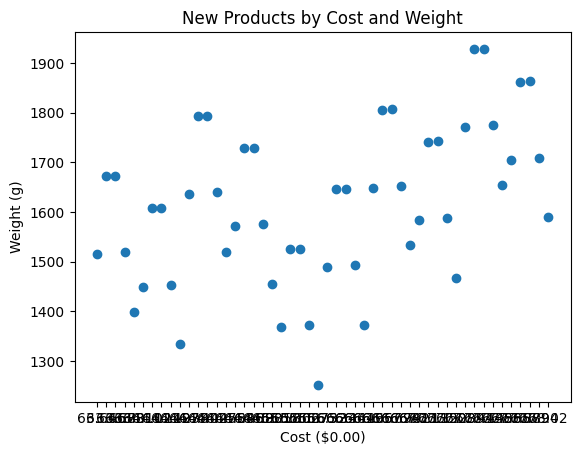

In [176]:
# Plot the scatter plot
plt.scatter(df['n.cost'], df['n.weight'])

# Set labels and title
plt.xlabel('Cost ($0.00)')
plt.ylabel('Weight (g)')
plt.title('New Products by Cost and Weight')

# Display the scatter plot
plt.show()